# **Tutorial 8: Paleoclimate Models**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Brodie Pearson

**Content editors:** Rieke Schäfer, Agustina Pesce, Zahra Khodakaramimaghsoud

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

###**Code and Data Sources**

Code for this tutorial is based on existing notebooks from LinkedEarth that explore [paleoclimate model-data comparisons](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb08_Model-DataConfrontationInTimeDomain.ipynb) using [PMIP3 model simulations](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb07_Model-DataConfrontationInFrequencyDomain.ipynb).

Data from the following sources are used in this tutorial:

*   Braconnot, P., Harrison, S., Kageyama, M. et al. Evaluation of climate models using palaeoclimatic data. Nature Clim Change 2, 417–424 (2012). https://doi.org/10.1038/nclimate1456
*   Tierney, J., Mayes, M., Meyer, N. et al. Late-twentieth-century warming in Lake Tanganyika unprecedented since AD 500. Nature Geosci 3, 422–425 (2010). https://doi.org/10.1038/ngeo865



















#**Tutorial 8 Objectives**

So far today, we've been focusing on how proxy-based reconstructions can be used to understand past variations in Earth's climate sytem. However, another useful tool in paleoclimate is the use of climate models.  

In this tutorial, you'll explore data from the [Paleoclimate Modelling Intercomparison Project 3 (PMIP3)](https://www.nature.com/articles/nclimate1456). More specifically, you'll be analyzing global mean surface temperature (GMST) data from  simulations for the past 1,000 years. 

You'll also compare the PMIP3 GMST data to a proxy-based reconstruction of temperature from Lake Tanganyika in East Africa [(Tierney et al., 2010)](https://www.nature.com/articles/ngeo865). Through this proxy-model comparison, you'll be able to assess the differences and similarities between the two datasets. 


By the end of this tutorial you will be able to:

*   Plot time series of paleoclimate model simulations
*   Compare and interpret proxy-based reconstructions of climate to paleoclimate model simulations of climate




In [ ]:
!pip install cartopy
!pip install pyleoclim
!pip install pandas
!pip install numpy
!pip install xarray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 51.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113631 sha256=6f386fe0c3cd6dc4bdc072fc256239a84eba846ba79905dc08217317c90cc859
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [ ]:
import pandas as pd
import numpy as np

import cartopy
import pyleoclim as pyleo

import xarray as xr


##Load proxy-based temperature reconstructions

The proxy record we'll be analyzing in this tutorial is a 1,000 year-long lake surface temperature reconstruction from [Tierney et al., 2010](https://https://doi.org/10.1038/ngeo865). This record is from Lake Taganyika in equatorial East Africa and is based on the TEX86 ratio, which is a temperature proxy derived from the distribution of the isoprenoid glycerol dialkyl glycerol tetraether (iGDGT) of archaeal membrane lipids. The organisms producing these iGDGT compounds alter the structure of the compound in response to changes in temperature, so by measure changes in the ratio of the different compounds, we can infer past changes in temperature.   

Let's start by loading the proxy data, saving it as a `Series` in Pyleoclim, and plotting a time series. 


In [ ]:
# Mount Google Drive locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/Shared drives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W1D4 - Paleoclimate/W1D4 Tutorials/data/'
proxy_temp = pd.read_csv(data_dir+'tang_sst.csv')

In [ ]:
proxy_temp.head()

,Year,LST
0,1996,25.7
1,1986,25.6
2,1976,25.0
3,1966,24.6
4,1956,24.5


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [years AD]', ylabel='Surface Temperature [ºC]'>)

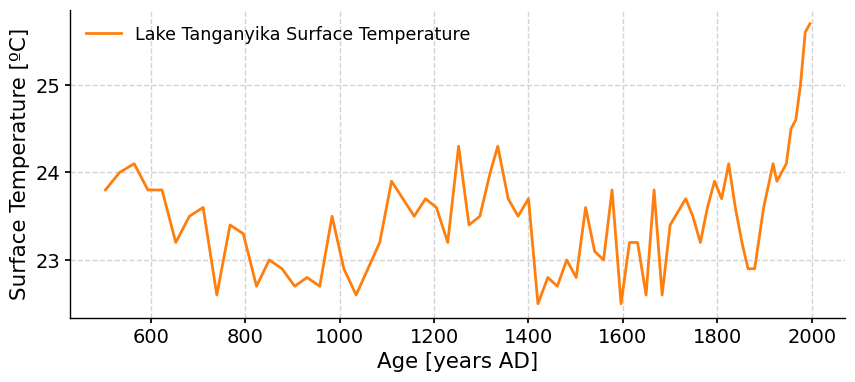

In [ ]:
proxy_t = pyleo.Series(
    time=proxy_temp['Year'],
    value= proxy_temp['LST'],
    time_name='Age',
    time_unit='years AD',
    value_name='Surface Temperature',
    value_unit='ºC',
    label='Lake Tanganyika Surface Temperature'
)

proxy_t.plot(color='C1')

Let's make some initial observations about the data:


*   What is the overall temperature trend over the past 1,000 years?
*   Where are the major increases or decrease in temperature? What could be the cause of these shifts in surface temperature? 



##Last Millenium PMIP3 GMST Data

We can now load GMST data from the PMIP3 simulations for the past 1,000 years [(Braconnot et al. 2012 )](https://https://doi.org/10.1038/nclimate1456). 


In [ ]:
# load the raw data
df = pd.read_table(data_dir+'PMIP3_GMST.txt')

# display the raw data
df

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,GISS-E2-R_r1i1p121,GISS-E2-R_r1i1p127,...,CESM_member_1,CESM_member_2,CESM_member_3,CESM_member_4,CESM_member_5,CESM_member_6,CESM_member_7,CESM_member_8,CESM_member_9,CESM_member_10
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,0.116333,0.155407,...,0.036672,0.067692,0.085340,-0.000616,0.157021,0.048458,0.038173,-0.027151,0.143404,-0.053464
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,0.068174,0.210337,...,0.246816,0.181400,0.251417,0.170710,0.165139,0.324856,0.191677,0.120951,0.216921,0.068698
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,0.060088,0.240585,...,0.187429,0.065922,0.190229,0.264551,0.092629,0.386593,0.068904,0.292246,0.101564,0.200259
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.074396,0.030596,...,0.202443,0.089054,-0.031298,0.205805,0.049447,0.023312,-0.041356,0.206064,0.212954,0.288272
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.402800,-0.330589,...,0.062795,0.137882,-0.233049,-0.227240,-0.156577,-0.339176,-0.103825,0.058420,-0.006102,-0.006619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that the data file includes several ensemble members for Community Earth System Model (CESM) and Goddard Institute for Space Studies (GISS) simulations. Ensembles are essentially groups of climate model simulations used for climate projections, or in this case, reconstructions. You will learn about this in much more detail on W2D1: Climate Modeling.

For now, we can replace these with their ensemble mean series.


In [ ]:
# Create a new pandas.DataFrame to store the processed data
df_new = df.copy()

# Remove the data columns for CESM and GISS ensemble members
for i in range(10):
    df_new = df_new.drop([f'CESM_member_{i+1}'], axis=1)
    
df_new = df_new.drop(['GISS-E2-R_r1i1p127.1'], axis=1)
df_new = df_new.drop(['GISS-E2-R_r1i1p127'], axis=1)
df_new = df_new.drop(['GISS-E2-R_r1i1p121'], axis=1)

# calculate the ensemble mean for CESM and GISS, and add the results into the table
df_new['CESM'] = df[[
    'CESM_member_1',
    'CESM_member_2',
    'CESM_member_3',
    'CESM_member_4',
    'CESM_member_5',
    'CESM_member_6',
    'CESM_member_7',
    'CESM_member_8',
    'CESM_member_9',
    'CESM_member_10',
]].mean(axis=1)

df_new['GISS'] = df[[
    'GISS-E2-R_r1i1p127.1',   
    'GISS-E2-R_r1i1p127',
    'GISS-E2-R_r1i1p121',
]].mean(axis=1)


In [ ]:
# display the processed data
df_new

,Year,bcc_csm1_1,CCSM4,FGOALS_gl,FGOALS_s2,IPSL_CM5A_LR,MPI_ESM_P,CSIRO,HadCM3,CESM,GISS
0,850,-0.570693,-0.431830,NaN,-0.620995,-0.475963,-0.170230,NaN,-0.620517,0.049553,0.127429
1,851,-0.698903,-0.411177,NaN,-0.753160,-0.742970,-0.303124,-0.398695,-0.553043,0.193858,0.138796
2,852,-0.575440,-0.404802,NaN,-0.743508,-0.758939,-0.422623,-0.406343,-0.560791,0.185033,0.098170
3,853,-0.724757,-0.552719,NaN,-0.869331,-0.746460,-0.335177,-0.353557,-0.438949,0.120470,-0.054552
4,854,-0.724328,-0.734938,NaN,-0.826238,-0.684093,-0.650792,-0.416140,-0.812194,-0.081349,-0.407169
...,...,...,...,...,...,...,...,...,...,...,...
1161,2011,1.013544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1162,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1163,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1164,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In our new dataframe, you can now see that the ensemble members for CESM and GISS are now replaced with one ensemble mean for each model simulation.



Now we can create a Pyleoclim `Series` object for each simulated GMST time series, which will allow us to easily plot the time series for each simulation and perform data analysis using various built-in tools.

In [ ]:
# store each pyleoclim.Series() object into a dictionary
ts_dict = {}
for name in df_new.columns[1:]:
    ts_dict[name] = pyleo.Series(
        time=df_new['Year'].values,  # the time axis
        value=df_new[name].values,   # the value axis
        label=name,                  # optional metadata: the nickname of the series
        time_name='Time',            # optional metadata: the name of the time axis
        time_unit='yrs',             # optional metadata: the unit of the time axis
        value_name='GMST anom.',     # optional metadata: the name of the value axis
        value_unit='K',              # optional metadata: the unit of the value axis
    )

We can now plot each simulation. For example, let's plot the CCSM4 GMST:

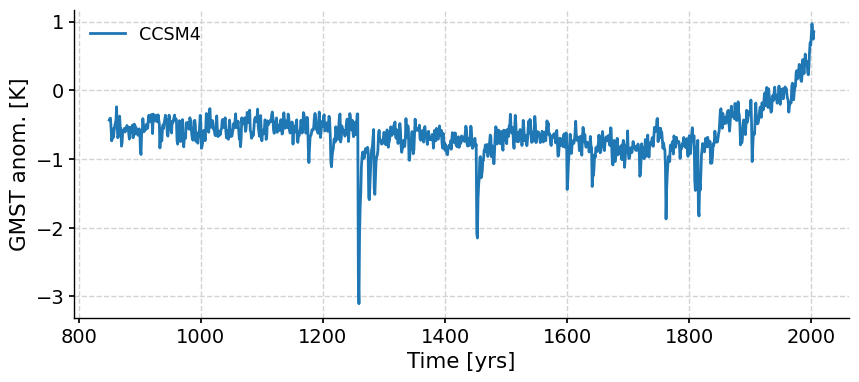

In [ ]:
fig, ax = ts_dict['CCSM4'].plot()

You can try plotting GMST data from different simulations by calling a different model name in the cell abov, e.g., `fig, ax = ts_dict['HadCM3'].plot()`.

But what if we wanted to plot all of the PMIP3 time series at once? We can do that using the `MultipleSeries` object in Pyleoclim, which takes a list of `Series` objects as input. To do so, we have to convert the dictionary of `Series` into a list and then create a `MultipleSeries` object.

In [ ]:
ts_list = [v for k, v in ts_dict.items()]  # a pythonic way to convert the pyleo.Series items in the dictionary to a list
ms_pmip = pyleo.MultipleSeries(ts_list)

We can now plot all PMIP3 simulation time series at once:

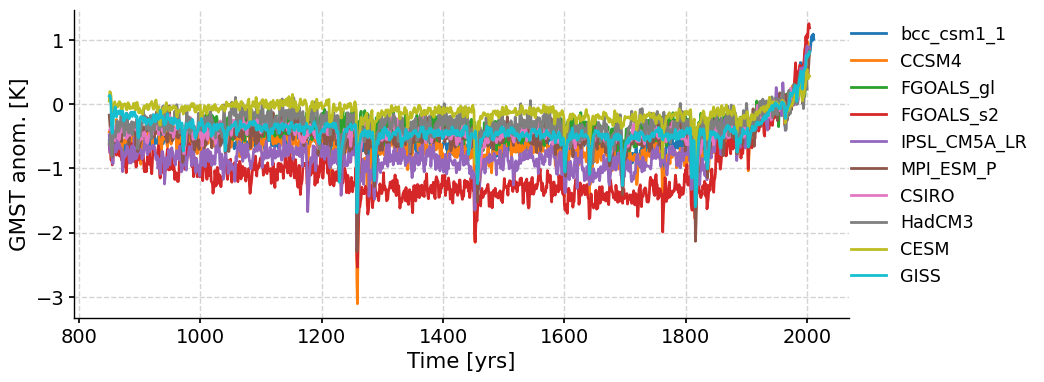

In [ ]:
fig, ax = ms_pmip.plot(
    lgd_kwargs={
        'bbox_to_anchor': (1.25, 1),  # move the legend to the right side
    }
)

The GMST reconstructions from all of the PMIP3 simulations follow the same overall trend of relatively stable, long-term temperature from 800-1800 AD, followed by an increase in temperature over the past 200 years. What do you think is driving this recent warming trend?

Despite the long-term similarities, there are also noticeable differences between the GMST time series from each simulation.  

*   What do you observe about the various time series?
*   How are the GMST reconstructions from each simulation different?
*   What could be causing these differences?
*   How do we know which simulation is the most accurate and reliable?



One approach to trying to constrain climate model simulations as assess their ability to simulate past climate is to compare model data to comparable proxy data.

##Proxy-Model Comparisons

Proxy-based reconstructions of climate variables in the past can provide direct measurements of temperature, precipitation, greenhouse gas concentration, etc. Comparing proxy paleoclimate records with paleoclimate model simulations can help to clarify the interpretation of the proxy record and also help to improve the ability of climate models to simulate past variations in climate.

Here, we'll compare the proxy-based Lake Tanganyika surface temperature reconstruction we downloaded and plotted at the beginning of the tutorial, with the GMST PMIP3 simulations.

In [ ]:
#Standardize the proxy data
proxy_stnd = proxy_t.standardize()

(-4.0, 2.0)

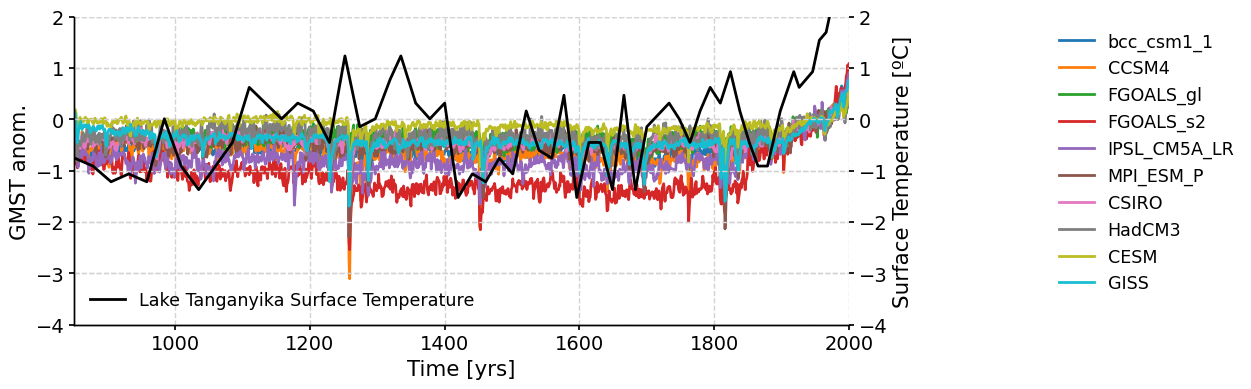

In [ ]:
fig, ax = ms_pmip.plot(
    lgd_kwargs={
        'bbox_to_anchor': (1.25, 1),  # move the legend to the right side
    }
)

ax.set_ylabel('GMST anom.')
ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax1.set_ylabel('Tanganyika LST')  # we already handled the x-label with ax1

proxy_stnd.plot(ax=ax1,color='black')
ax.set_xlim(xmin=850,xmax=2000)
ax.set_ylim(ymin=-4,ymax=2)
ax1.set_ylim(ymin=-4,ymax=2)

How do the model simulated GMST and proxy-based surface temperature compare?


*   Are the long term trends over the last millenium similar or different?
*   Is there more variability in the proxy or model temperatures? What might be causing this? 
*   How does the timing of temperature change compare?

This is just one simplified example of a proxy-model comparison. Larger-scale proxy-model comparisons can help to identify spatial patterns of temperature change and assess forcing mechanisms of paleoclimate variations. In W2D1, you'll spend more time exploring climate models.

In the next and final tutorial for today, you'll explore another tool for assessing past climate variability using both proxies and models.

In [ ]:
# Rieke Schäfer comments
# ======================

# Installations run well (maybe remove the comments for packages not needed?)
# for importing the path needs to be adapted, because it is set absolute not relative (but I have no idea in which context the particpants will get it, so might be fine)
# there seems to be some text missing under the objectives
# from the "model simulations" on there are many helpful comments in the code :)
# some text explaining the objective last plot would be nice
# the last cell does a spurious printing of the last setting ("(-4.0, 2.0)" in this case). Maybe someone with more experience with pyleoclim can figure out how to avoid that, I couldn't find it.